# Uso de Machine Learning para a previsão de Diabetes

## DataSet Utilizado para a pesquisa


https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

# Analisando o dataset

In [ ]:
#Bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import KNNImputer

In [ ]:
#Criação do modelo
diabetes_data = pd.read_csv('diabetes.csv')

In [ ]:
diabetes_data.head()

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

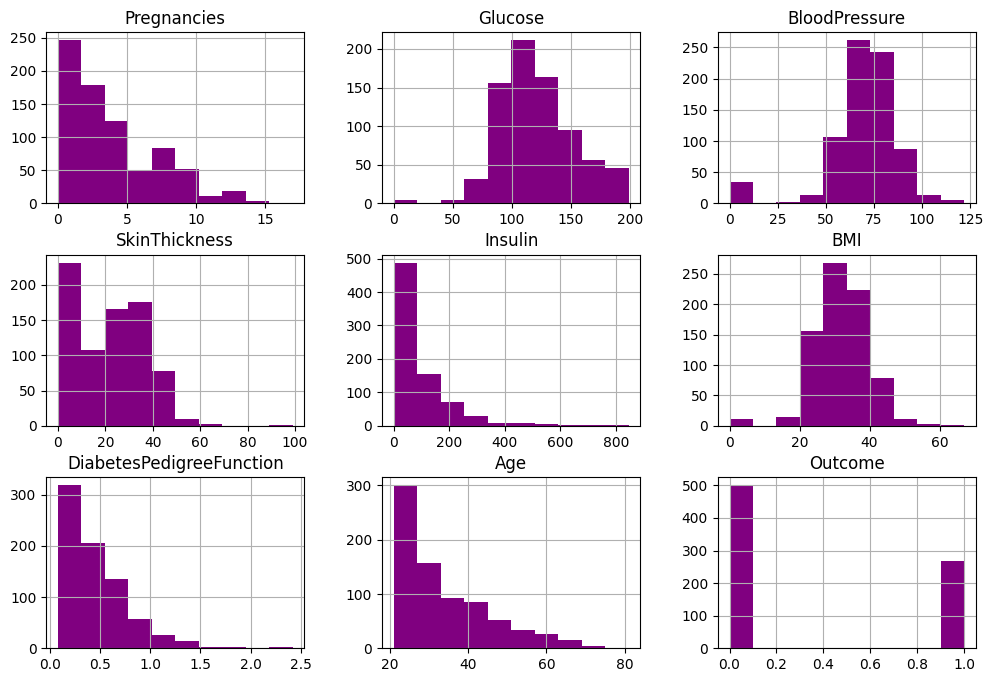

In [ ]:
diabetes_data.hist(figsize=(12, 8), color="purple")

# Criando os modelos de Treinamento e Teste

In [ ]:
from sklearn.model_selection import train_test_split

dx = diabetes_data.drop(columns=['Outcome'])
dy = diabetes_data['Outcome']

diabetes_treinamento_x, diabetes_teste_x, diabetes_treinamento_y, diabetes_teste_y = train_test_split(dx, dy, test_size=0.2, random_state=25)


In [ ]:
diabetes_treinamento_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 118 to 132
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


In [ ]:
diabetes_teste_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 459 to 597
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    int64  
 1   Glucose                   154 non-null    int64  
 2   BloodPressure             154 non-null    int64  
 3   SkinThickness             154 non-null    int64  
 4   Insulin                   154 non-null    int64  
 5   BMI                       154 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 10.8 KB


In [ ]:
diabetes_treinamento_y.head()

,Outcome
118,0
336,0
374,0
518,0
716,1


# Limpando e corrigindo os dados

In [ ]:
lista_ignorada = ['Pregnancies', 'DiabetesPedigreeFunction']
(diabetes_treinamento_x.drop(columns=lista_ignorada) == 0).sum()

,0
Glucose,4
BloodPressure,26
SkinThickness,177
Insulin,298
BMI,8
Age,0


In [ ]:
lista_reagente = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_treinamento_x[lista_reagente] = diabetes_treinamento_x[lista_reagente].replace(0, np.nan)

In [ ]:
diabetes_treinamento_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 118 to 132
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   610 non-null    float64
 2   BloodPressure             588 non-null    float64
 3   SkinThickness             437 non-null    float64
 4   Insulin                   316 non-null    float64
 5   BMI                       606 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 43.2 KB


In [ ]:
diabetes_treinamento_x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,610.000000,588.000000,437.000000,316.000000,606.000000,614.000000,614.000000
mean,3.842020,122.088525,72.664966,29.068650,157.781646,32.433828,0.474443,33.526059
std,3.409438,30.900051,12.358018,10.618698,119.302948,7.050083,0.342406,11.706657
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,21.000000,82.000000,27.500000,0.244250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,128.500000,32.000000,0.365000,29.000000
75%,6.000000,141.750000,80.000000,36.000000,190.000000,36.600000,0.626750,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000


In [ ]:
print(diabetes_treinamento.median())

Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
SkinThickness                29.000
Insulin                     128.500
BMI                          32.000
DiabetesPedigreeFunction      0.365
Age                          29.000
Outcome                       0.000
dtype: float64


In [ ]:
medianas = diabetes_treinamento_x.median()

iguais_a_mediana = diabetes_treinamento_x.eq(medianas)

contagem = iguais_a_mediana.sum()

print(contagem)


Pregnancies                 61
Glucose                     10
BloodPressure               33
SkinThickness               15
Insulin                      0
BMI                          9
DiabetesPedigreeFunction     2
Age                         23
dtype: int64


In [ ]:
diabetes_treinamento_x[lista_reagente] = diabetes_treinamento_x[lista_reagente].fillna(diabetes_treinamento_x[lista_reagente].median())

In [ ]:
diabetes_treinamento_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 118 to 132
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 43.2 KB


In [ ]:
print(diabetes_treinamento_x.median())

Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
SkinThickness                29.000
Insulin                     128.500
BMI                          32.000
DiabetesPedigreeFunction      0.365
Age                          29.000
dtype: float64


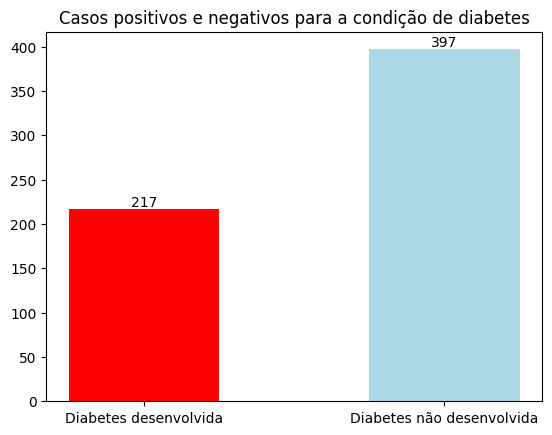

In [ ]:
diabetes_treinamento = pd.concat([diabetes_treinamento_x, diabetes_treinamento_y], axis=1)

qtd_positivos = (diabetes_treinamento['Outcome'] == 1).sum()
qtd_negativos = (diabetes_treinamento['Outcome'] == 0).sum()

fig, ax = plt.subplots()

bars = ax.bar(x=['Diabetes desenvolvida', 'Diabetes não desenvolvida'], height=[qtd_positivos, qtd_negativos], width=0.5, color=['red', 'lightblue'], label=['Diabetes desenvolvida', 'Diabetes não desenvolvida'])

ax.bar_label(bars)

ax.set_title('Casos de Diabetes')

plt.title('Casos positivos e negativos para a condição de diabetes')
plt.show()


In [ ]:
diabetes_positivo = diabetes_treinamento[diabetes_treinamento['Outcome'] == 1]
diabetes_negativo = diabetes_treinamento[diabetes_treinamento['Outcome'] == 0]

diabetes_positivo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
716,3,173.0,78.0,39.0,128.5,33.8,0.9700,31,1
370,3,173.0,82.0,42.5,128.5,38.4,1.2005,25,1
9,8,125.0,96.0,29.0,128.5,32.0,0.2320,54,1
215,12,151.0,70.0,40.0,128.5,41.8,0.7420,38,1
111,8,155.0,62.0,26.0,128.5,34.0,0.5430,46,1


In [ ]:
diabetes_negativo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
118,4,97.0,60.0,23.0,128.5,28.2,0.443,22,0
336,0,117.0,72.0,29.0,128.5,33.8,0.932,44,0
374,2,122.0,52.0,43.0,158.0,36.2,0.816,28,0
518,13,76.0,60.0,29.0,128.5,32.8,0.180,41,0
134,2,96.0,68.0,13.0,49.0,21.1,0.647,26,0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

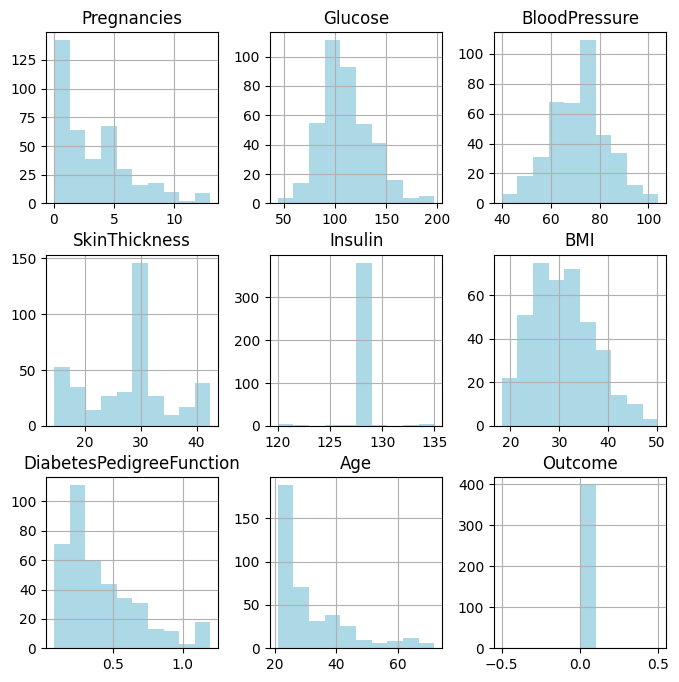

In [ ]:
diabetes_negativo.hist(figsize=(8, 8), color="lightblue")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

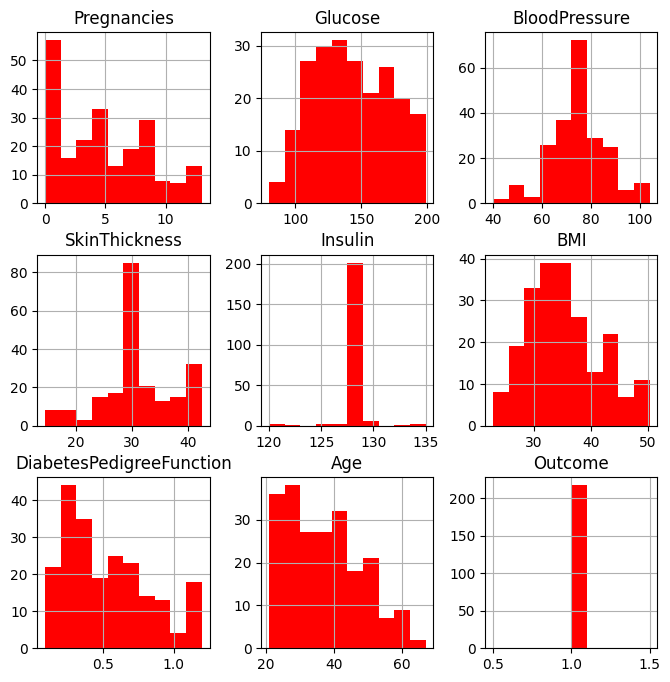

In [ ]:
diabetes_positivo.hist(figsize=(8, 8), color="red")

## Outliers: Pregnancies

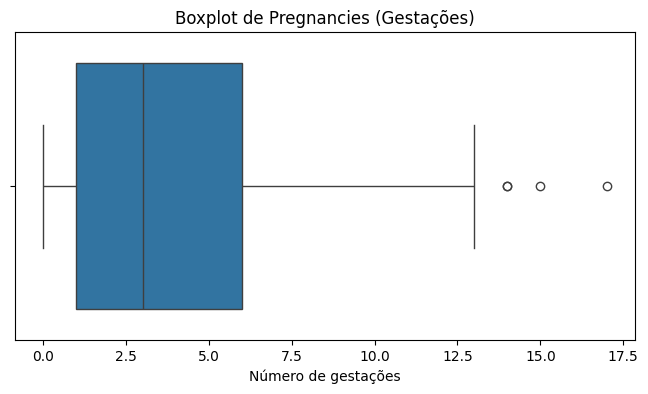

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['Pregnancies'])
plt.title('Boxplot de Pregnancies (Gestações)')
plt.xlabel('Número de gestações')
plt.show()

In [ ]:
# 1. Calcular os quartis
Q1 = diabetes_treinamento_x['Pregnancies'].quantile(0.25)
Q3 = diabetes_treinamento_x['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definir os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [ ]:
filtro_pregnancies = diabetes_treinamento_x['Pregnancies'] >= limite_superior
maiores_pregnancies = diabetes_treinamento_x[filtro_pregnancies]
maiores_pregnancies.sort_values(by='Pregnancies', ascending=False).head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46
455,14,175.0,62.0,30.0,128.5,33.6,0.212,38


In [ ]:
print(diabetes_treinamento_x[diabetes_treinamento_x['Pregnancies'] > 12])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
518           13     76.0           60.0           29.0    128.5  32.8   
159           17    163.0           72.0           41.0    114.0  40.9   
298           14    100.0           78.0           25.0    184.0  36.6   
357           13    129.0           72.0           30.0    128.5  39.9   
28            13    145.0           82.0           19.0    110.0  22.2   
72            13    126.0           90.0           29.0    128.5  43.4   
691           13    158.0          114.0           29.0    128.5  42.3   
274           13    106.0           70.0           29.0    128.5  34.2   
635           13    104.0           72.0           29.0    128.5  31.2   
86            13    106.0           72.0           54.0    128.5  36.6   
323           13    152.0           90.0           33.0     29.0  26.8   
455           14    175.0           62.0           30.0    128.5  33.6   
88            15    136.0           70

In [ ]:
diabetes_treinamento_x['Pregnancies'] = diabetes_treinamento_x['Pregnancies'].clip(lower=limite_inferior, upper=13)

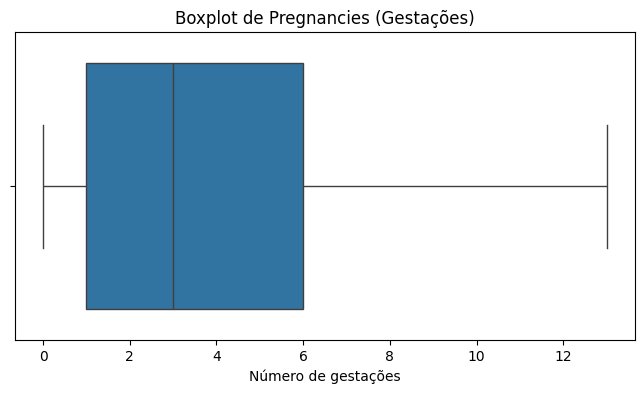

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['Pregnancies'])
plt.title('Boxplot de Pregnancies (Gestações)')
plt.xlabel('Número de gestações')
plt.show()

## Outliers: Glucose

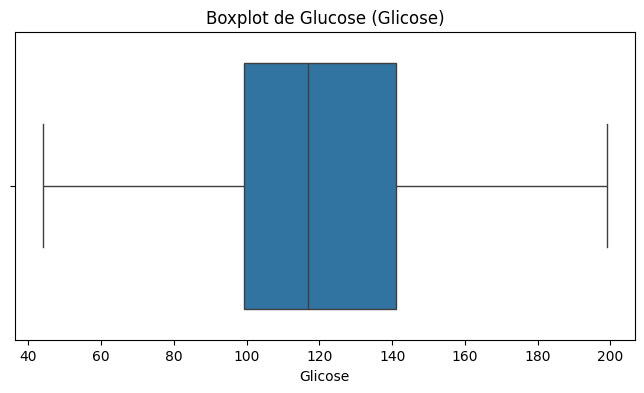

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['Glucose'])
plt.title('Boxplot de Glucose (Glicose)')
plt.xlabel('Glicose')
plt.show()



## Outliers: BloodPressure

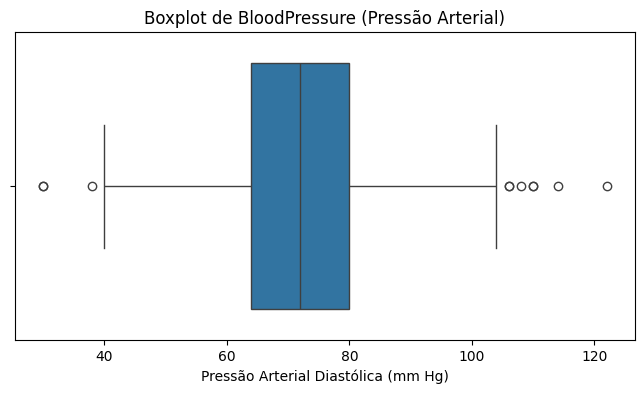

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['BloodPressure'])
plt.title('Boxplot de BloodPressure (Pressão Arterial)')
plt.xlabel('Pressão Arterial Diastólica (mm Hg)')
plt.show()

In [ ]:
# 1. Calcular os quartis
Q1_sangue = diabetes_treinamento_x['BloodPressure'].quantile(0.25)
Q3_sangue = diabetes_treinamento_x['BloodPressure'].quantile(0.75)
IQR_sangue = Q3_sangue - Q1_sangue

# 2. Definir os limites
limite_inferior_sangue = Q1_sangue - 1.5 * IQR_sangue
limite_superior_sangue = Q3_sangue + 1.5 * IQR_sangue

In [ ]:
filtro_pressure = (diabetes_treinamento_x['BloodPressure'] <= limite_inferior_sangue) | (diabetes_treinamento_x['BloodPressure'] >= limite_superior_sangue)
extremos_pressure = diabetes_treinamento_x[filtro_pressure]
extremos_pressure.sort_values(by='BloodPressure', ascending=False).head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
106,1,96.0,122.0,29.0,128.5,22.4,0.207,27
691,13,158.0,114.0,29.0,128.5,42.3,0.257,44
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54
362,5,103.0,108.0,37.0,128.5,39.2,0.305,65
672,10,68.0,106.0,23.0,49.0,35.5,0.285,47
662,8,167.0,106.0,46.0,231.0,37.6,0.165,43
440,0,189.0,104.0,25.0,128.5,34.3,0.435,41
207,5,162.0,104.0,29.0,128.5,37.7,0.151,52
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
print(limite_superior_sangue)
print(limite_inferior_sangue)

104.0
40.0


In [ ]:
diabetes_treinamento_x['BloodPressure'] = diabetes_treinamento_x['BloodPressure'].clip(lower=limite_inferior_sangue, upper=limite_superior_sangue)

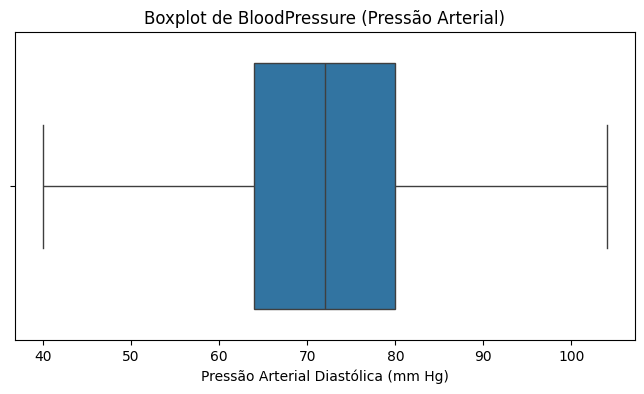

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['BloodPressure'])
plt.title('Boxplot de BloodPressure (Pressão Arterial)')
plt.xlabel('Pressão Arterial Diastólica (mm Hg)')
plt.show()

In [ ]:
diabetes_treinamento['BloodPressure'].hist(figsize=(8, 5), color="purple")

## Outliers: SkinThickness

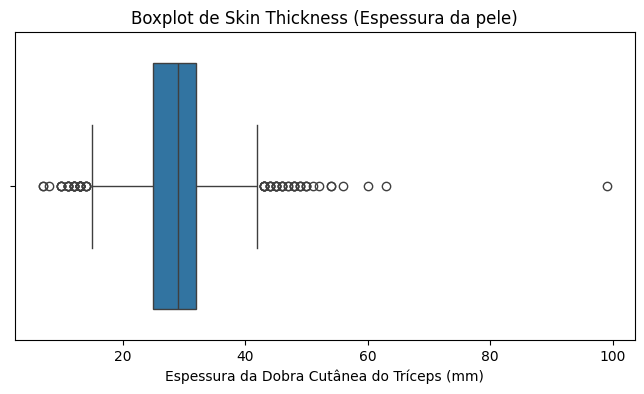

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['SkinThickness'])
plt.title('Boxplot de Skin Thickness (Espessura da pele)')
plt.xlabel('Espessura da Dobra Cutânea do Tríceps (mm)')
plt.show()

In [ ]:
# 1. Calcular os quartis
Q1_pele = diabetes_treinamento_x['SkinThickness'].quantile(0.25)
Q3_pele = diabetes_treinamento_x['SkinThickness'].quantile(0.75)
IQR_pele = Q3_pele - Q1_pele

# 2. Definir os limites
limite_inferior_pele = Q1_pele - 1.5 * IQR_pele
limite_superior_pele = Q3_pele + 1.5 * IQR_pele

In [ ]:
print(limite_superior_pele)
print(limite_inferior_pele)

42.5
14.5


In [ ]:
filtro_thickness = (diabetes_treinamento_x['SkinThickness'] <= limite_inferior_pele) | (diabetes_treinamento_x['SkinThickness'] >= limite_superior_pele)
extremos_thickness = diabetes_treinamento_x[filtro_thickness]

In [ ]:
print(extremos_thickness.sort_values(by='SkinThickness', ascending=False))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2    197.0           70.0           99.0    128.5  34.7   
445            0    180.0           78.0           63.0     14.0  59.4   
57             0    100.0           88.0           60.0    110.0  46.8   
120            0    162.0           76.0           56.0    100.0  53.2   
86            13    106.0           72.0           54.0    128.5  36.6   
..           ...      ...            ...            ...      ...   ...   
313            3    113.0           50.0           10.0     85.0  29.5   
671            1     99.0           58.0           10.0    128.5  25.4   
434            1     90.0           68.0            8.0    128.5  24.5   
254           12     92.0           62.0            7.0    258.0  27.6   
519            6    129.0           90.0            7.0    326.0  19.6   

     DiabetesPedigreeFunction  Age  
579                     0.575   62  
445                     2.420   25  


In [ ]:
plt.scatter(diabetes_treinamento['SkinThickness'], diabetes_treinamento['BMI'])
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('Gráfico de Dispersão')
plt.grid(True)
plt.show()

In [ ]:
print(extremos_thickness.count())

Pregnancies                 71
Glucose                     71
BloodPressure               71
SkinThickness               71
Insulin                     71
BMI                         71
DiabetesPedigreeFunction    71
Age                         71
Outcome                     71
dtype: int64


In [ ]:
diabetes_treinamento_x['SkinThickness'] = diabetes_treinamento_x['SkinThickness'].clip(lower=limite_inferior_pele, upper=limite_superior_pele)

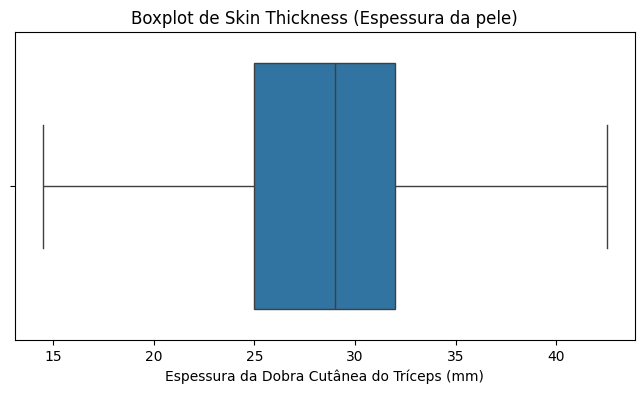

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['SkinThickness'])
plt.title('Boxplot de Skin Thickness (Espessura da pele)')
plt.xlabel('Espessura da Dobra Cutânea do Tríceps (mm)')
plt.show()

<Axes: >

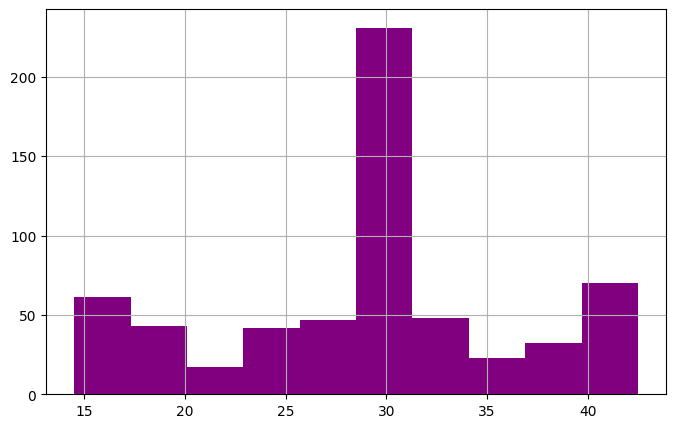

In [ ]:
diabetes_treinamento_x['SkinThickness'].hist(figsize=(8, 5), color="purple")

## Outliers: Insulin

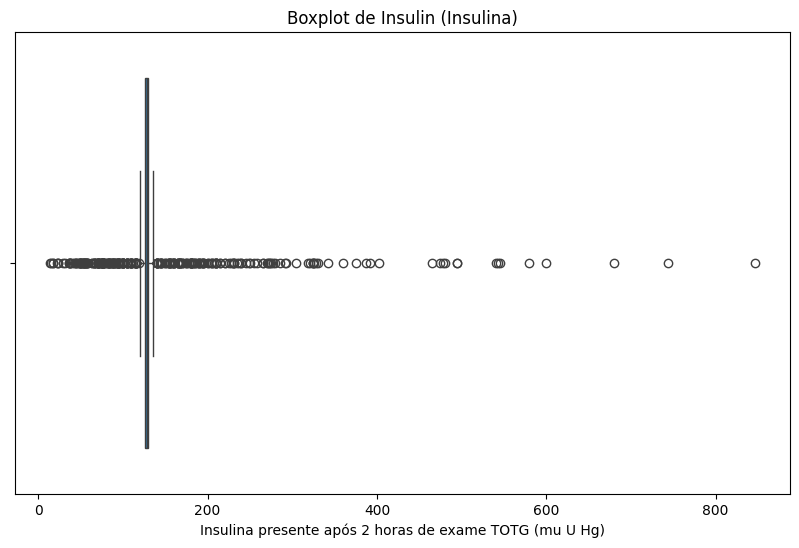

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=diabetes_treinamento_x['Insulin'])
plt.title('Boxplot de Insulin (Insulina)')
plt.xlabel('Insulina presente após 2 horas de exame TOTG (mu U Hg)')
plt.show()

In [ ]:
# 1. Calcular os quartis
Q1_insulina = diabetes_treinamento_x['Insulin'].quantile(0.25)
Q3_insulina = diabetes_treinamento_x['Insulin'].quantile(0.75)
IQR_insulina = Q3_insulina - Q1_insulina

# 2. Definir os limites
limite_inferior_insulina = Q1_insulina - 1.5 * IQR_insulina
limite_superior_insulina = Q3_insulina + 1.5 * IQR_insulina

In [ ]:
filtro_insulina = (diabetes_treinamento_x['Insulin'] <= limite_inferior_insulina) | (diabetes_treinamento_x['Insulin'] >= limite_superior_insulina)
extremos_insulina = diabetes_treinamento_x[filtro_insulina]

In [ ]:
print(extremos_insulina.count())

Pregnancies                 288
Glucose                     288
BloodPressure               288
SkinThickness               288
Insulin                     288
BMI                         288
DiabetesPedigreeFunction    288
Age                         288
dtype: int64


In [ ]:
diabetes_treinamento_x.loc[diabetes_treinamento_x['Insulin'] > limite_superior_insulina, 'Insulin'] = np.nan
diabetes_treinamento_x.loc[diabetes_treinamento_x['Insulin'] < limite_inferior_insulina, 'Insulin'] = np.nan

In [ ]:
(diabetes_treinamento_x['Insulin'].isnull()).sum()

np.int64(282)

In [ ]:
print(diabetes_treinamento_x['Insulin'].median())
print(diabetes_treinamento_x['Insulin'].mean())

128.5
128.41265060240963


In [ ]:
diabetes_treinamento_x['Insulin'] = diabetes_treinamento_x['Insulin'].fillna(diabetes_treinamento_x['Insulin'].median())

<Axes: >

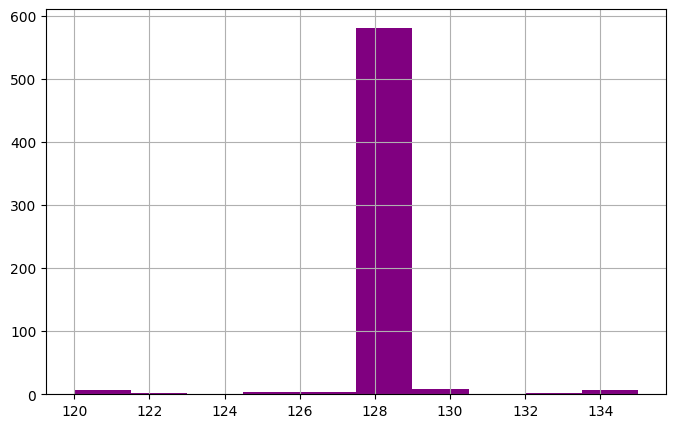

In [ ]:
diabetes_treinamento_x['Insulin'].hist(figsize=(8, 5), color="purple")

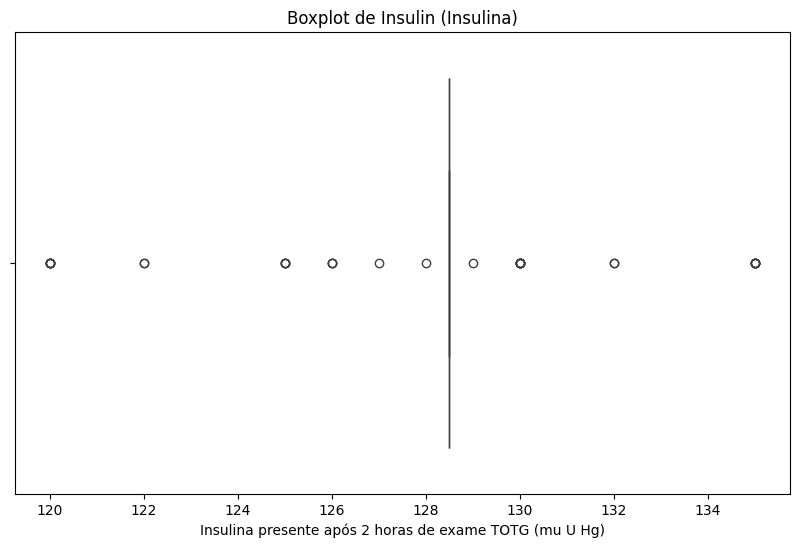

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=diabetes_treinamento_x['Insulin'])
plt.title('Boxplot de Insulin (Insulina)')
plt.xlabel('Insulina presente após 2 horas de exame TOTG (mu U Hg)')
plt.show()

## Outliers: BMI

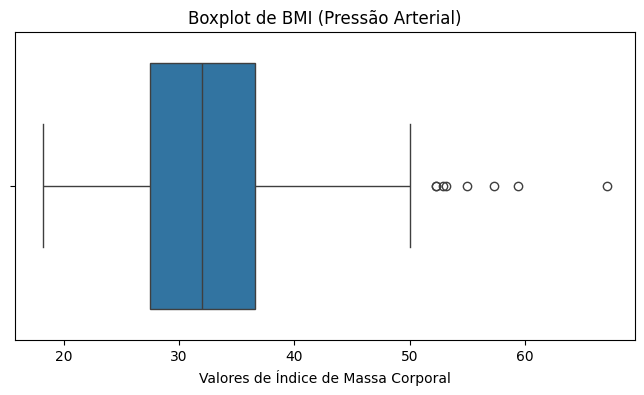

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['BMI'])
plt.title('Boxplot de BMI (Pressão Arterial)')
plt.xlabel('Valores de Índice de Massa Corporal')
plt.show()

In [ ]:
# 1. Calcular os quartis
Q1_bmi = diabetes_treinamento_x['BMI'].quantile(0.25)
Q3_bmi = diabetes_treinamento_x['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# 2. Definir os limites
limite_inferior_bmi = Q1_bmi - 1.5 * IQR_bmi
limite_superior_bmi = Q3_bmi + 1.5 * IQR_bmi

In [ ]:
filtro_bmi = (diabetes_treinamento_x['BMI'] <= limite_inferior_bmi) | (diabetes_treinamento_x['BMI'] >= limite_superior_bmi)
extremos_bmi = diabetes_treinamento_x[filtro_bmi]
extremos_bmi.sort_values(by='BMI', ascending=False).head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
177,0,129.0,104.0,42.5,130.0,67.1,0.319,26
445,0,180.0,78.0,42.5,128.5,59.4,2.420,25
673,3,123.0,100.0,35.0,128.5,57.3,0.880,22
125,1,88.0,40.0,42.0,128.5,55.0,0.496,26
120,0,162.0,76.0,42.5,128.5,53.2,0.759,25
303,5,115.0,98.0,29.0,128.5,52.9,0.209,28
247,0,165.0,90.0,33.0,128.5,52.3,0.427,23
193,11,135.0,72.0,29.0,128.5,52.3,0.578,40


In [ ]:
print(limite_superior_bmi)
print(limite_inferior_bmi)

50.25
13.849999999999998


In [ ]:
diabetes_treinamento_x['BMI'] = diabetes_treinamento_x['BMI'].clip(lower=limite_inferior_bmi, upper=limite_superior_bmi)

<Axes: >

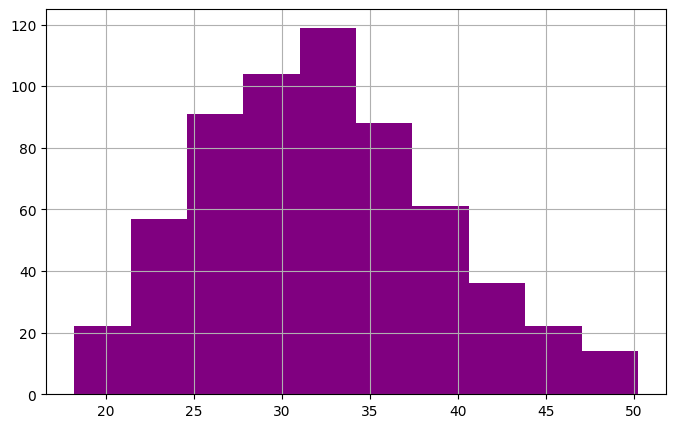

In [ ]:
diabetes_treinamento_x['BMI'].hist(figsize=(8, 5), color="purple")

## Outliers: DiabetesPedigreeFunction

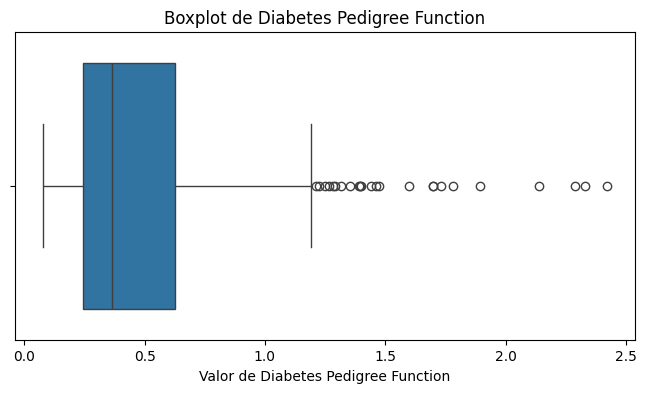

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['DiabetesPedigreeFunction'])
plt.title('Boxplot de Diabetes Pedigree Function')
plt.xlabel('Valor de Diabetes Pedigree Function')
plt.show()

In [ ]:
# 1. Calcular os quartis
Q1_dpf = diabetes_treinamento_x['DiabetesPedigreeFunction'].quantile(0.25)
Q3_dpf = diabetes_treinamento_x['DiabetesPedigreeFunction'].quantile(0.75)
IQR_dpf = Q3_dpf - Q1_dpf

# 2. Definir os limites
limite_inferior_dpf = Q1_dpf - 1.5 * IQR_dpf
limite_superior_dpf = Q3_dpf + 1.5 * IQR_dpf

In [ ]:
filtro_dpf = (diabetes_treinamento_x['DiabetesPedigreeFunction'] <= limite_inferior_dpf) | (diabetes_treinamento_x['DiabetesPedigreeFunction'] >= limite_superior_dpf)
extremos_dpf = diabetes_treinamento_x[filtro_dpf]
extremos_dpf.sort_values(by='DiabetesPedigreeFunction', ascending=False).head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
445,0,180.0,78.0,42.5,128.5,50.25,2.420,25
228,4,197.0,70.0,39.0,128.5,36.70,2.329,31
4,0,137.0,40.0,35.0,128.5,43.10,2.288,33
370,3,173.0,82.0,42.5,128.5,38.40,2.137,25
45,0,180.0,66.0,39.0,128.5,42.00,1.893,25
58,0,146.0,82.0,29.0,128.5,40.50,1.781,44
371,0,118.0,64.0,23.0,128.5,32.00,1.731,21
593,2,82.0,52.0,22.0,128.5,28.50,1.699,25
621,2,92.0,76.0,20.0,128.5,24.20,1.698,28
395,2,127.0,58.0,24.0,128.5,27.70,1.600,25


In [ ]:
diabetes_treinamento_x['DiabetesPedigreeFunction'] = diabetes_treinamento_x['DiabetesPedigreeFunction'].clip(lower=limite_inferior_dpf, upper=limite_superior_dpf)

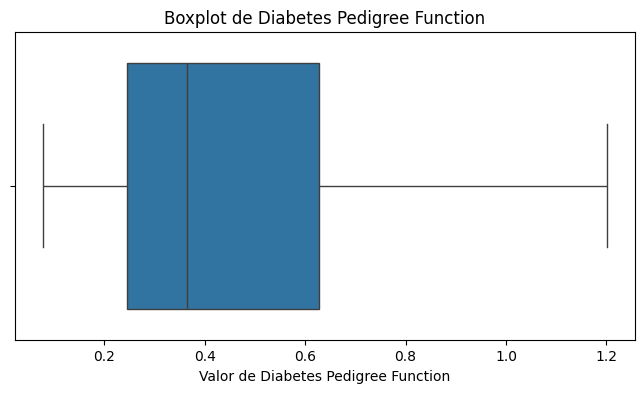

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['DiabetesPedigreeFunction'])
plt.title('Boxplot de Diabetes Pedigree Function')
plt.xlabel('Valor de Diabetes Pedigree Function')
plt.show()

<Axes: >

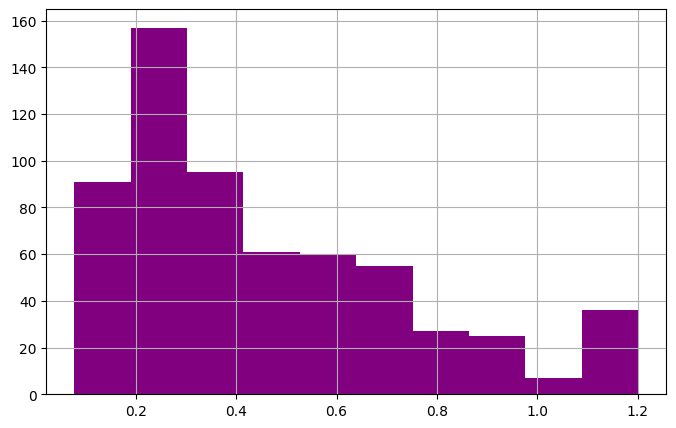

In [ ]:
diabetes_treinamento_x['DiabetesPedigreeFunction'].hist(figsize=(8, 5), color="purple")

## Outliers: Age

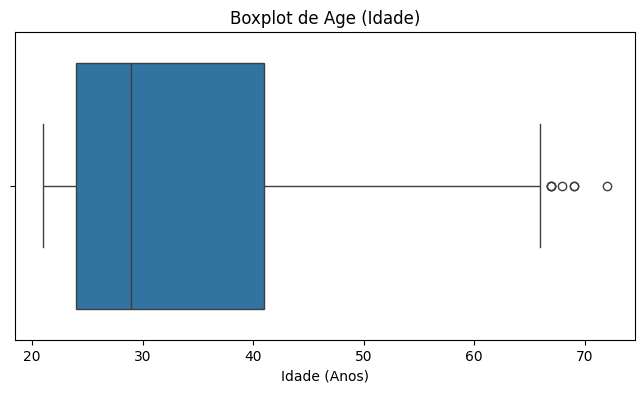

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=diabetes_treinamento_x['Age'])
plt.title('Boxplot de Age (Idade)')
plt.xlabel('Idade (Anos)')
plt.show()

# Entendendo as informações das colunas

## Pregnancies

In [ ]:
media_diabetes = diabetes_positivo['Pregnancies'].mean()
moda_diabetes = diabetes_positivo['Pregnancies'].mode().tolist()
mediana_diabetes = diabetes_positivo['Pregnancies'].median()
print(f'Média de gestações com diabetes: {media_diabetes}')
print(f'Moda de gestações com diabetes: {moda_diabetes}')
print(f'Mediana de gestações com diabetes: {mediana_diabetes}')


Média de gestações com diabetes: 4.8341013824884795
Moda de gestações com diabetes: [0]
Mediana de gestações com diabetes: 4.0


In [ ]:
media_diabetes_nao = diabetes_negativo['Pregnancies'].mean()
moda_diabetes_nao = diabetes_negativo['Pregnancies'].mode().tolist()
mediana_diabetes_nao = diabetes_negativo['Pregnancies'].median()
print(f'Média de gestações sem diabetes: {media_diabetes_nao}')
print(f'Moda de gestações sem diabetes: {moda_diabetes_nao}')
print(f'Mediana de gestações sem diabetes: {mediana_diabetes_nao}')

Média de gestações sem diabetes: 3.279596977329975
Moda de gestações sem diabetes: [1]
Mediana de gestações sem diabetes: 2.0


In [ ]:
db_gravidezes_positivo = diabetes_positivo['Pregnancies'].value_counts().head(7)
db_gravidezes_negativo = diabetes_negativo['Pregnancies'].value_counts().head(7)

In [ ]:
print(db_gravidezes_positivo)

Pregnancies
0    32
1    25
3    22
7    19
8    18
5    18
2    16
Name: count, dtype: int64


In [ ]:
print(db_gravidezes_negativo)

Pregnancies
1    83
2    64
0    59
3    39
4    38
6    30
5    29
Name: count, dtype: int64


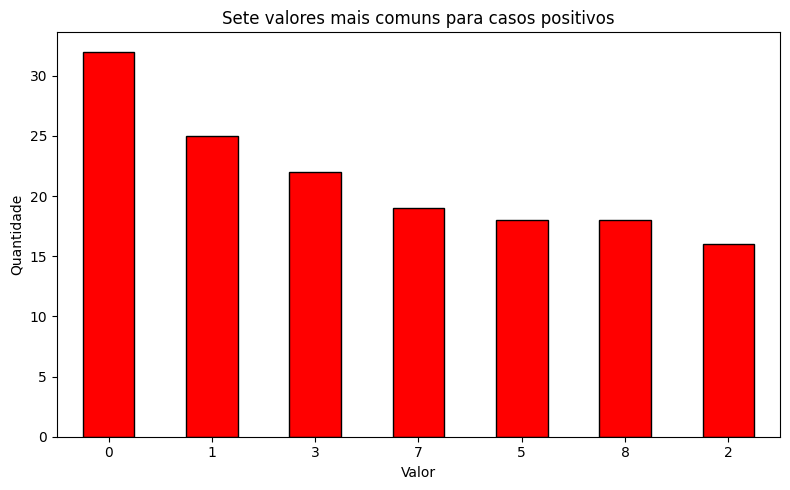

In [ ]:
plt.figure(figsize=(8, 5))
db_gravidezes_positivo.plot(kind='bar', color='red', edgecolor='black')

plt.title('Sete valores mais comuns para casos positivos')
plt.xlabel('Valor')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

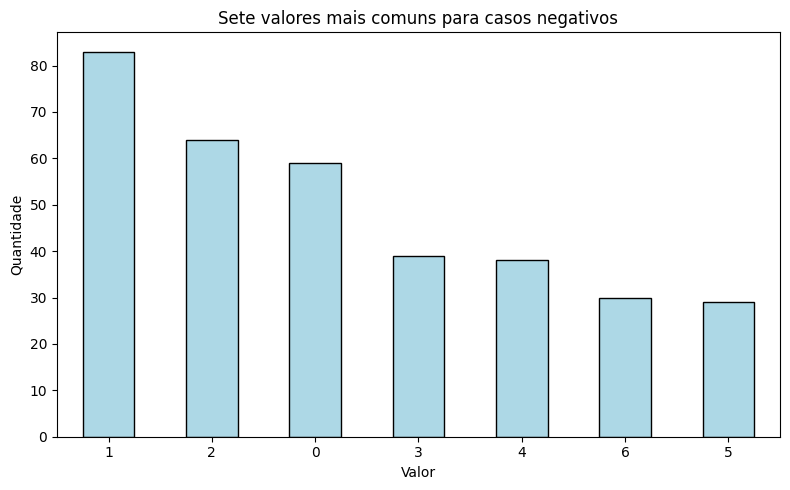

In [ ]:
plt.figure(figsize=(8, 5))
db_gravidezes_negativo.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Sete valores mais comuns para casos negativos')
plt.xlabel('Valor')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Glucose

<Axes: >

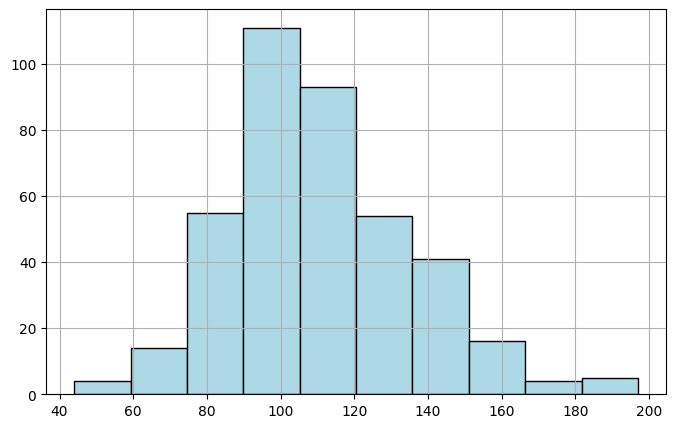

In [ ]:
diabetes_negativo['Glucose'].hist(figsize=(8, 5), color='lightblue', edgecolor='black')

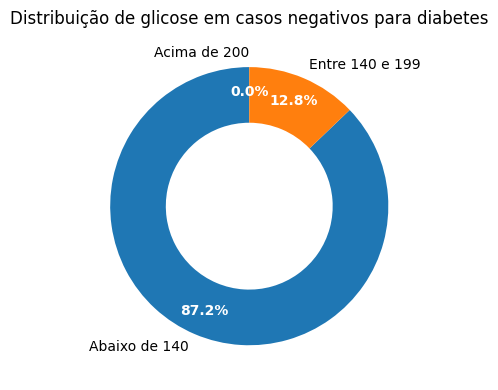

In [ ]:
label = ["Abaixo de 140", "Entre 140 e 199", "Acima de 200"]
bins = [0, 140, 200, float('inf')]

intervalo = pd.cut(diabetes_negativo['Glucose'], bins=bins, labels=label, right=False)

contagens = intervalo.value_counts().sort_index()

plt.figure(figsize=(5, 4))

wedges, texts, autotexts = plt.pie(
    contagens,
    labels=contagens.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4),
    pctdistance=0.82,
    labeldistance=1.1,
    textprops=dict(color="black")
)

plt.setp(autotexts, size=10, weight="bold", color="white")
plt.title('Distribuição de glicose em casos negativos para diabetes')
plt.tight_layout()

plt.show()

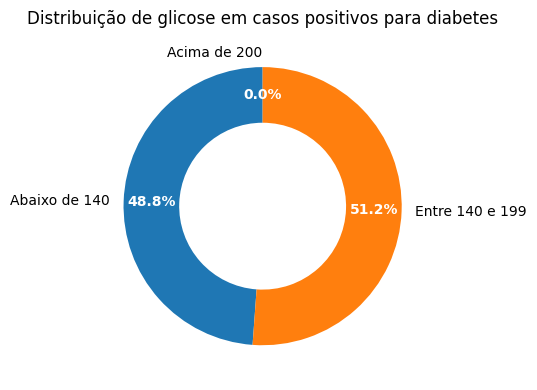

In [ ]:
label = ["Abaixo de 140", "Entre 140 e 199", "Acima de 200"]
bins = [0, 140, 200, float('inf')]

intervalo = pd.cut(diabetes_positivo['Glucose'], bins=bins, labels=label, right=False)

contagens = intervalo.value_counts().sort_index()

plt.figure(figsize=(5, 4))

wedges, texts, autotexts = plt.pie(
    contagens,
    labels=contagens.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4),
    pctdistance=0.80,
    labeldistance=1.1,
    textprops=dict(color="black")
)

plt.setp(autotexts, size=10, weight="bold", color="white")
plt.title('Distribuição de glicose em casos positivos para diabetes')
plt.tight_layout()

plt.show()

## BloodPressure

In [ ]:
media_pressao_positiva = diabetes_positivo['BloodPressure'].mean()
moda_pressao_positiva = diabetes_positivo['BloodPressure'].mode().tolist()
mediana_pressao_positiva = diabetes_positivo['BloodPressure'].median()
print(f'Média de pressão sanguínea com diabetes: {media_pressao_positiva}')
print(f'Moda de pressão sanguínea com diabetes: {moda_pressao_positiva}')
print(f'Mediana de pressão sanguínea com diabetes: {mediana_pressao_positiva}')

Média de pressão sanguínea com diabetes: 74.80184331797236
Moda de pressão sanguínea com diabetes: [72.0]
Mediana de pressão sanguínea com diabetes: 74.0


In [ ]:
media_pressao_negativa = diabetes_negativo['BloodPressure'].mean()
moda_pressao_negativa = diabetes_negativo['BloodPressure'].mode().tolist()
mediana_pressao_negativa = diabetes_negativo['BloodPressure'].median()
print(f'Média de pressão sanguínea com diabetes: {media_pressao_negativa}')
print(f'Moda de pressão sanguínea com diabetes: {moda_pressao_negativa}')
print(f'Mediana de pressão sanguínea com diabetes: {mediana_pressao_negativa}')

Média de pressão sanguínea com diabetes: 71.38790931989925
Moda de pressão sanguínea com diabetes: [72.0]
Mediana de pressão sanguínea com diabetes: 72.0


In [ ]:
db_pressao_positiva = diabetes_positivo['BloodPressure'].value_counts().head(1)
db_pressao_negativa = diabetes_negativo['BloodPressure'].value_counts().head(1)

In [ ]:
print("Valor mais alto de pressão sanguínea quando diabetes foi desenvolvida: " + str(diabetes_positivo['BloodPressure'].max()))
print("Valor mais alto de pressão sanguínea quando diabetes não foi desenvolvida: " + str(diabetes_negativo['BloodPressure'].max()))

Valor mais alto de pressão sanguínea quando diabetes foi desenvolvida: 114.0
Valor mais alto de pressão sanguínea quando diabetes não foi desenvolvida: 122.0


<Axes: >

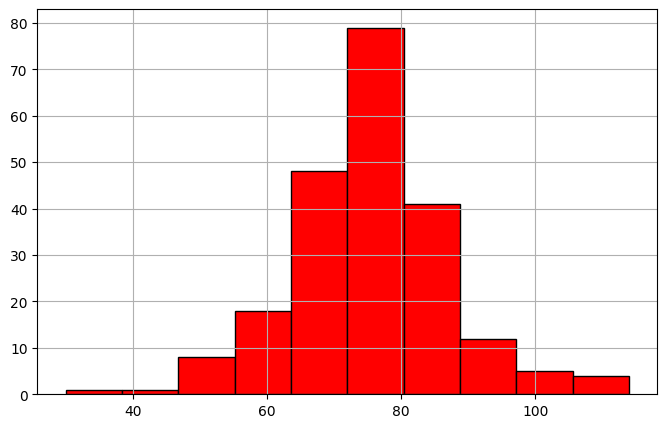

In [ ]:
diabetes_positivo['BloodPressure'].hist(figsize=(8, 5), color='red', edgecolor='black')

<Axes: >

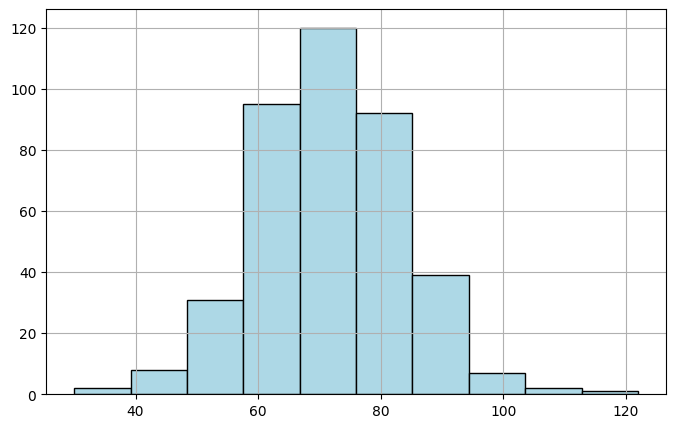

In [ ]:
diabetes_negativo['BloodPressure'].hist(figsize=(8, 5), color='lightblue', edgecolor='black')

## SkinThickness

In [ ]:
media_espessura_positiva = diabetes_positivo['SkinThickness'].mean()
moda_espessura_positiva = diabetes_positivo['SkinThickness'].mode().tolist()
mediana_espessura_positiva = diabetes_positivo['SkinThickness'].median()
print(f'Média de espessura com diabetes: {media_espessura_positiva}')
print(f'Moda de espessura com diabetes: {moda_espessura_positiva}')
print(f'Mediana de espessura sanguínea com diabetes: {mediana_espessura_positiva}')

Média de espessura com diabetes: 30.859447004608295
Moda de espessura com diabetes: [29.0]
Mediana de espessura sanguínea com diabetes: 29.0


In [ ]:
media_espessura_negativa = diabetes_negativo['SkinThickness'].mean()
moda_espessura_negativa = diabetes_negativo['SkinThickness'].mode().tolist()
mediana_espessura_negativa = diabetes_negativo['SkinThickness'].median()
print(f'Média de espessura com diabetes: {media_espessura_negativa}')
print(f'Moda de espessura com diabetes: {moda_espessura_negativa}')
print(f'Mediana de espessura sanguínea com diabetes: {mediana_espessura_negativa}')

Média de espessura com diabetes: 27.634760705289672
Moda de espessura com diabetes: [29.0]
Mediana de espessura sanguínea com diabetes: 29.0


In [ ]:
print("Valor mais alto de espessura da pele quando diabetes foi desenvolvida: " + str(diabetes_positivo['SkinThickness'].max()))
print("Valor mais alto de espessura da pele quando diabetes não foi desenvolvida: " + str(diabetes_negativo['SkinThickness'].max()))

Valor mais alto de espessura da pele quando diabetes foi desenvolvida: 42.5
Valor mais alto de espessura da pele quando diabetes não foi desenvolvida: 42.5


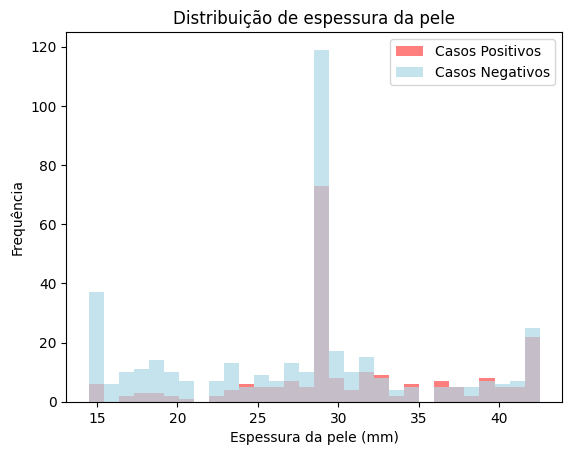

In [ ]:
espessura_positiva = diabetes_positivo['SkinThickness']
espessura_negativa = diabetes_negativo['SkinThickness']

plt.hist(espessura_positiva, bins=30, alpha=0.5, label='Casos Positivos', color="red")
plt.hist(espessura_negativa, bins=30, alpha=0.7, label='Casos Negativos', color="lightblue")

plt.xlabel('Espessura da pele (mm)')
plt.ylabel('Frequência')
plt.title('Distribuição de espessura da pele')
plt.legend()

plt.show()

## Insulin

In [ ]:
media_insulina_positiva = diabetes_positivo['Insulin'].mean()
moda_insulina_positiva = diabetes_positivo['Insulin'].mode().tolist()
mediana_insulina_positiva = diabetes_positivo['Insulin'].median()
print(f'Média de espessura com diabetes: {media_insulina_positiva}')
print(f'Moda de espessura com diabetes: {moda_insulina_positiva}')
print(f'Mediana de espessura sanguínea com diabetes: {mediana_insulina_positiva}')

Média de espessura com diabetes: 128.45391705069125
Moda de espessura com diabetes: [128.5]
Mediana de espessura sanguínea com diabetes: 128.5


In [ ]:
media_insulina_negativa = diabetes_negativo['Insulin'].mean()
moda_insulina_negativa = diabetes_negativo['Insulin'].mode().tolist()
mediana_insulina_negativa = diabetes_negativo['Insulin'].median()
print(f'Média de espessura com diabetes: {media_insulina_negativa}')
print(f'Moda de espessura com diabetes: {moda_insulina_negativa}')
print(f'Mediana de espessura sanguínea com diabetes: {mediana_insulina_negativa}')

Média de espessura com diabetes: 128.4521410579345
Moda de espessura com diabetes: [128.5]
Mediana de espessura sanguínea com diabetes: 128.5


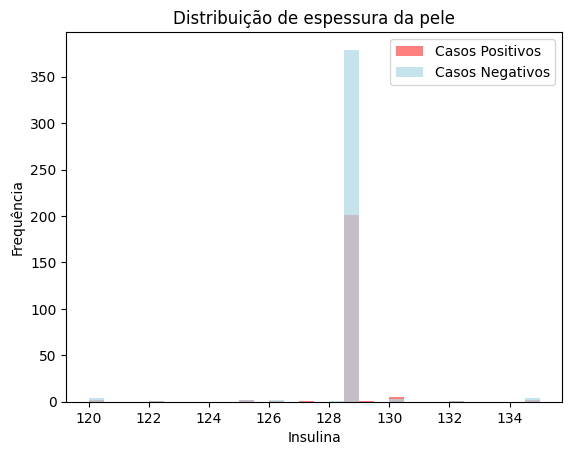

In [ ]:
insulina_positiva = diabetes_positivo['Insulin']
insulina_negativa = diabetes_negativo['Insulin']

plt.hist(insulina_positiva, bins=30, alpha=0.5, label='Casos Positivos', color="red")
plt.hist(insulina_negativa, bins=30, alpha=0.7, label='Casos Negativos', color="lightblue")

plt.xlabel('Insulina')
plt.ylabel('Frequência')
plt.title('Distribuição de espessura da pele')
plt.legend()

plt.show()

## BMI

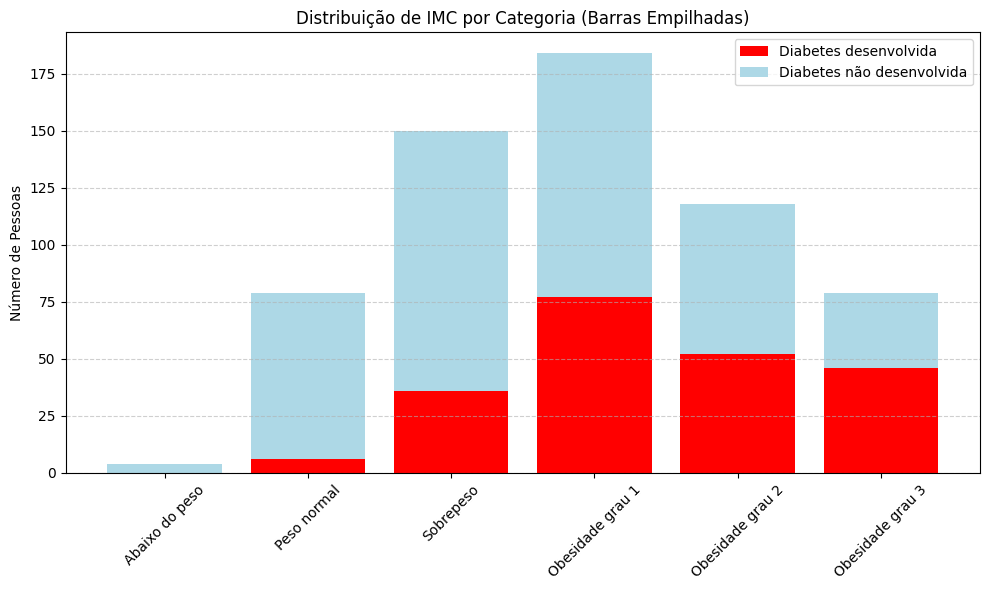

In [ ]:
categorias_imc = ["Abaixo do peso", "Peso normal", "Sobrepeso", "Obesidade grau 1", "Obesidade grau 2", "Obesidade grau 3"]
valores_imc = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]

contagem_x = pd.cut(diabetes_positivo['BMI'], bins=valores_imc, labels=categorias_imc).value_counts().reindex(categorias_imc, fill_value=0)
contagem_y = pd.cut(diabetes_negativo['BMI'], bins=valores_imc, labels=categorias_imc).value_counts().reindex(categorias_imc, fill_value=0)

x = range(len(categorias_imc))
plt.figure(figsize=(10, 6))

plt.bar(x, contagem_x, label='Diabetes desenvolvida', color='red')

plt.bar(x, contagem_y, bottom=contagem_x, label='Diabetes não desenvolvida', color='lightblue')

plt.xticks(x, categorias_imc, rotation=45)
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de IMC por Categoria (Barras Empilhadas)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Diabetes Pedigree Function

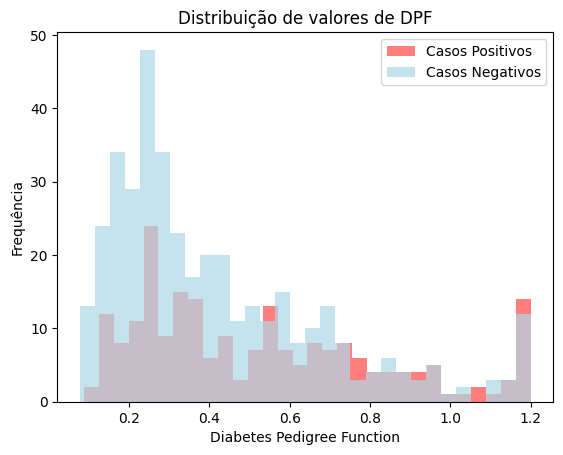

In [ ]:
dpf_positiva = diabetes_positivo['DiabetesPedigreeFunction']
dpf_negativa = diabetes_negativo['DiabetesPedigreeFunction']

plt.hist(dpf_positiva, bins=30, alpha=0.5, label='Casos Positivos', color="red")
plt.hist(dpf_negativa, bins=30, alpha=0.7, label='Casos Negativos', color="lightblue")

plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequência')
plt.title('Distribuição de valores de DPF')
plt.legend()

plt.show()

## Age

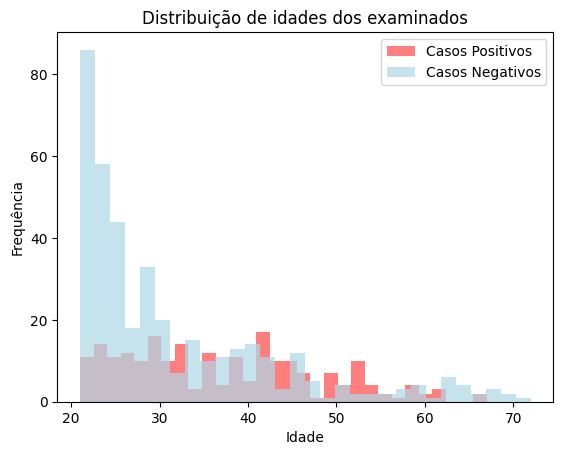

In [ ]:
age_positiva = diabetes_positivo['Age']
age_negativa = diabetes_negativo['Age']

plt.hist(age_positiva, bins=30, alpha=0.5, label='Casos Positivos', color="red")
plt.hist(age_negativa, bins=30, alpha=0.7, label='Casos Negativos', color="lightblue")

plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de idades dos examinados')
plt.legend()

plt.show()

# Aplicando modelos de ML

## Regressão Logística

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

db_logreg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

db_logreg.fit(diabetes_treinamento_x, diabetes_treinamento_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
pred_logreg_x = db_logreg.predict(diabetes_treinamento_x)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate

In [ ]:
resultado_cv_logreg = cross_validate(
    estimator=db_logreg,
    X=diabetes_treinamento_x,
    y=diabetes_treinamento_y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)



In [ ]:
print("Resultados médios da validação cruzada com cinco partições (folds):")
for metrica in ['accuracy', 'precision', 'recall', 'f1']:
    media_treino = resultado_cv_logreg[f'train_{metrica}'].mean()
    media_teste = resultado_cv_logreg[f'test_{metrica}'].mean()
    print(f"{metrica.capitalize()} | Treino: {media_treino:.3f} | Teste: {media_teste:.3f}")

Resultados médios da validação cruzada com cinco partições (folds):
Accuracy | Treino: 0.766 | Teste: 0.754
Precision | Treino: 0.714 | Teste: 0.696
Recall | Treino: 0.563 | Teste: 0.544
F1 | Treino: 0.630 | Teste: 0.609


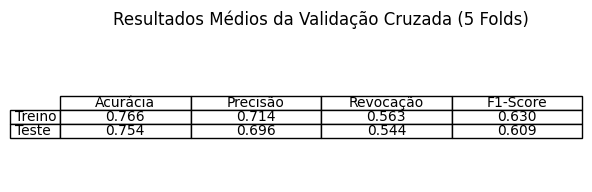

In [ ]:

metricas = ['Accuracy', 'Precision', 'Recall', 'F1']
valores_treino = [resultado_cv_logreg[f'train_{m.lower()}'].mean() for m in metricas]
valores_teste = [resultado_cv_logreg[f'test_{m.lower()}'].mean() for m in metricas]


fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')

tabela = [[f"{v:.3f}" for v in valores_treino],
          [f"{v:.3f}" for v in valores_teste]]


colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
linhas = ['Treino', 'Teste']

ax.table(cellText=tabela, colLabels=colunas, rowLabels=linhas, cellLoc='center', loc='center')

plt.title("Resultados Médios da Validação Cruzada (5 Folds)", pad=20)
plt.tight_layout(pad=1.0)
plt.show()

In [ ]:
matriz_logreg = confusion_matrix(diabetes_treinamento_y, pred_logreg_x)

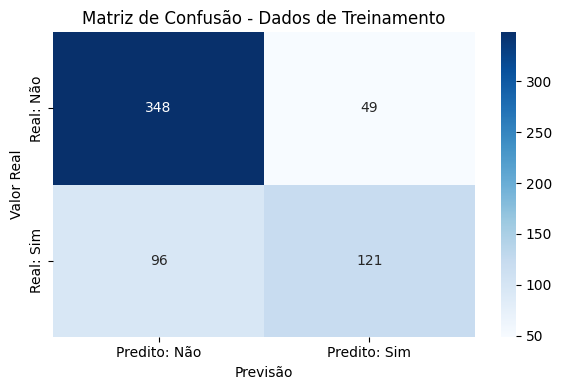

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predito: Não', 'Predito: Sim'],
            yticklabels=['Real: Não', 'Real: Sim'])

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.tight_layout()
plt.show()

## Árvores de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
db_dectree = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=4, random_state=25)
)

In [ ]:
db_dectree.fit(diabetes_treinamento_x, diabetes_treinamento_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=25))])

In [ ]:
pred_dectree_x = db_dectree.predict(diabetes_treinamento_x)

In [ ]:
resultado_cv_dectree = cross_validate(
    estimator=db_dectree,
    X=diabetes_treinamento_x,
    y=diabetes_treinamento_y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

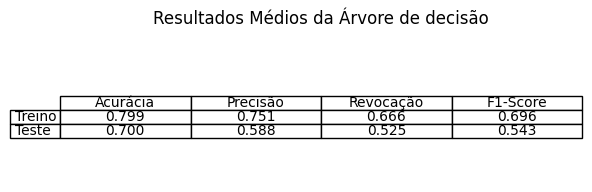

In [ ]:

metricas = ['Accuracy', 'Precision', 'Recall', 'F1']
valores_treino_tree = [resultado_cv_dectree[f'train_{m.lower()}'].mean() for m in metricas]
valores_teste_tree = [resultado_cv_dectree[f'test_{m.lower()}'].mean() for m in metricas]


fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')

tabela = [[f"{v:.3f}" for v in valores_treino_tree],
          [f"{v:.3f}" for v in valores_teste_tree]]


colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
linhas = ['Treino', 'Teste']

ax.table(cellText=tabela, colLabels=colunas, rowLabels=linhas, cellLoc='center', loc='center')

plt.title("Resultados Médios da Árvore de decisão", pad=20)
plt.tight_layout(pad=1.0)
plt.show()

In [ ]:
matriz_dectree = confusion_matrix(diabetes_treinamento_y, pred_dectree_x)

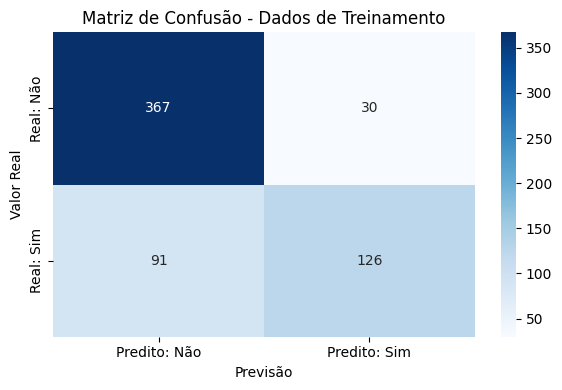

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_dectree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predito: Não', 'Predito: Sim'],
            yticklabels=['Real: Não', 'Real: Sim'])

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(db_dectree, feature_names=diabetes_treinamento_x.columns, class_names=["Não", "Sim"], filled=True)
plt.title("Árvore de Decisão - Classificação de Diabetes")
plt.show()

## Floresta Aleatória

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
db_ranfor = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=25)
)

In [ ]:
db_ranfor.fit(diabetes_treinamento_x, diabetes_treinamento_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, random_state=25))])

In [ ]:
pred_ranfor = db_ranfor.predict(diabetes_treinamento_x)

In [ ]:
resultado_cv_ranfor = cross_validate(
    estimator=db_ranfor,
    X=diabetes_treinamento_x,
    y=diabetes_treinamento_y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

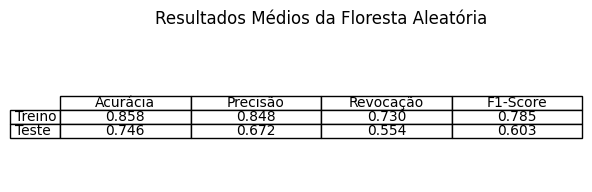

In [ ]:

metricas = ['Accuracy', 'Precision', 'Recall', 'F1']
valores_treino_random = [resultado_cv_ranfor[f'train_{m.lower()}'].mean() for m in metricas]
valores_teste_random = [resultado_cv_ranfor[f'test_{m.lower()}'].mean() for m in metricas]


fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')

tabela = [[f"{v:.3f}" for v in valores_treino_random],
          [f"{v:.3f}" for v in valores_teste_random]]


colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
linhas = ['Treino', 'Teste']

ax.table(cellText=tabela, colLabels=colunas, rowLabels=linhas, cellLoc='center', loc='center')

plt.title("Resultados Médios da Floresta Aleatória", pad=20)
plt.tight_layout(pad=1.0)
plt.show()

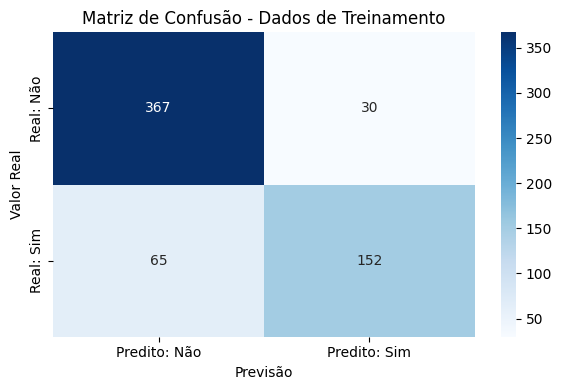

In [ ]:
matriz_ranfor = confusion_matrix(diabetes_treinamento_y, pred_ranfor)

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_ranfor, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predito: Não', 'Predito: Sim'],
            yticklabels=['Real: Não', 'Real: Sim'])

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.tight_layout()
plt.show()

## Máquinas de Vetores de Suporte

In [ ]:
from sklearn.svm import SVC

In [ ]:
db_svm = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=1.0, random_state=25)
)

In [ ]:
db_svm.fit(diabetes_treinamento_x, diabetes_treinamento_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=25))])

In [ ]:
pred_svm = db_svm.predict(diabetes_treinamento_x)

In [ ]:
resultado_cv_svm = cross_validate(
    estimator=db_svm,
    X=diabetes_treinamento_x,
    y=diabetes_treinamento_y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

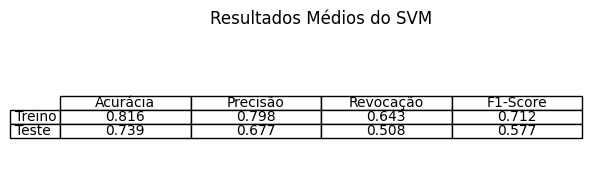

In [ ]:

metricas = ['Accuracy', 'Precision', 'Recall', 'F1']
valores_treino_svm = [resultado_cv_svm[f'train_{m.lower()}'].mean() for m in metricas]
valores_teste_svm = [resultado_cv_svm[f'test_{m.lower()}'].mean() for m in metricas]


fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')

tabela = [[f"{v:.3f}" for v in valores_treino_svm],
          [f"{v:.3f}" for v in valores_teste_svm]]


colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
linhas = ['Treino', 'Teste']

ax.table(cellText=tabela, colLabels=colunas, rowLabels=linhas, cellLoc='center', loc='center')

plt.title("Resultados Médios do SVM", pad=20)
plt.tight_layout(pad=1.0)
plt.show()

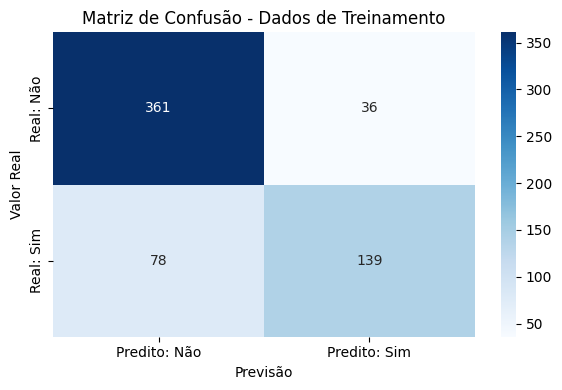

In [ ]:
matriz_svm = confusion_matrix(diabetes_treinamento_y, pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predito: Não', 'Predito: Sim'],
            yticklabels=['Real: Não', 'Real: Sim'])

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.tight_layout()
plt.show()

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
db_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

In [ ]:
db_knn.fit(diabetes_treinamento_x, diabetes_treinamento_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
pred_knn = db_knn.predict(diabetes_treinamento_x)

In [ ]:
resultado_cv_knn = cross_validate(
    estimator=db_knn,
    X=diabetes_treinamento_x,
    y=diabetes_treinamento_y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

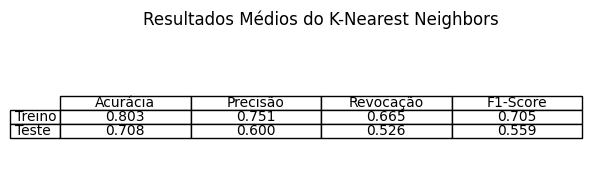

In [ ]:

metricas = ['Accuracy', 'Precision', 'Recall', 'F1']
valores_treino_knn = [resultado_cv_knn[f'train_{m.lower()}'].mean() for m in metricas]
valores_teste_knn = [resultado_cv_knn[f'test_{m.lower()}'].mean() for m in metricas]


fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')

tabela = [[f"{v:.3f}" for v in valores_treino_knn],
          [f"{v:.3f}" for v in valores_teste_knn]]


colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
linhas = ['Treino', 'Teste']

ax.table(cellText=tabela, colLabels=colunas, rowLabels=linhas, cellLoc='center', loc='center')

plt.title("Resultados Médios do K-Nearest Neighbors", pad=20)
plt.tight_layout(pad=1.0)
plt.show()

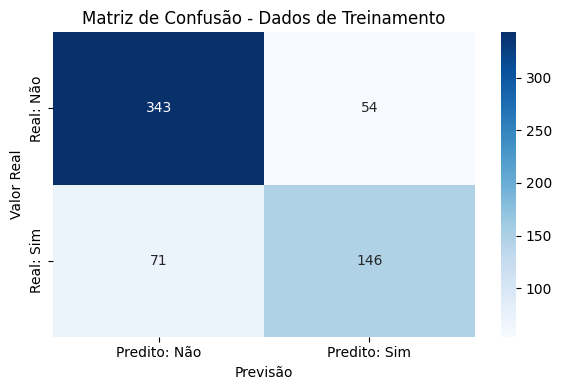

In [ ]:
matriz_knn = confusion_matrix(diabetes_treinamento_y, pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predito: Não', 'Predito: Sim'],
            yticklabels=['Real: Não', 'Real: Sim'])

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.tight_layout()
plt.show()

# Verificando nos dados de teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

## Regressão Logística

In [ ]:
pred_logreg_teste = db_logreg.predict(diabetes_teste_x)

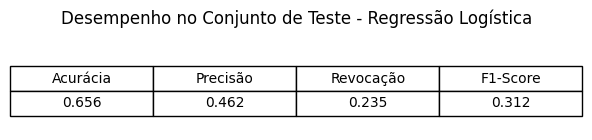

In [ ]:

acc_logreg = accuracy_score(diabetes_teste_y, pred_logreg_teste)
prec_logreg = precision_score(diabetes_teste_y, pred_logreg_teste)
rec_logreg = recall_score(diabetes_teste_y, pred_logreg_teste)
f1_logreg = f1_score(diabetes_teste_y, pred_logreg_teste)

fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')

colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
valores = [[f"{acc_logreg:.3f}", f"{prec_logreg:.3f}", f"{rec_logreg:.3f}", f"{f1_logreg:.3f}"]]

tabela = ax.table(
    cellText=valores,
    colLabels=colunas,
    loc='center',
    cellLoc='center'
)

tabela.scale(1.2, 2.2)
plt.title("Desempenho no Conjunto de Teste - Regressão Logística", pad=20)
plt.tight_layout()
plt.show()

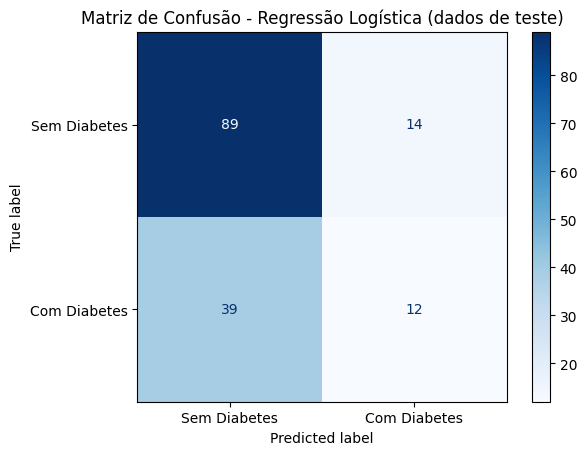

In [ ]:
cm_logreg = confusion_matrix(diabetes_teste_y, pred_logreg_teste)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["Sem Diabetes", "Com Diabetes"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística (dados de teste)")
plt.show()

## Árvores de Decisão

In [ ]:
pred_dectree_teste = db_dectree.predict(diabetes_teste_x)

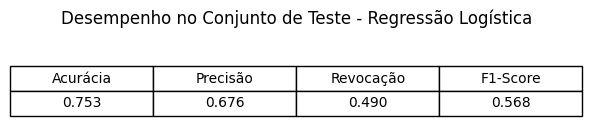

In [ ]:

acc_dectree = accuracy_score(diabetes_teste_y, pred_dectree_teste)
prec_dectree = precision_score(diabetes_teste_y, pred_dectree_teste)
rec_dectree = recall_score(diabetes_teste_y, pred_dectree_teste)
f1_dectree = f1_score(diabetes_teste_y, pred_dectree_teste)

fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')

colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
valores = [[f"{acc_dectree:.3f}", f"{prec_dectree:.3f}", f"{rec_dectree:.3f}", f"{f1_dectree:.3f}"]]

tabela = ax.table(
    cellText=valores,
    colLabels=colunas,
    loc='center',
    cellLoc='center'
)

tabela.scale(1.2, 2.2)
plt.title("Desempenho no Conjunto de Teste - Regressão Logística", pad=20)
plt.tight_layout()
plt.show()

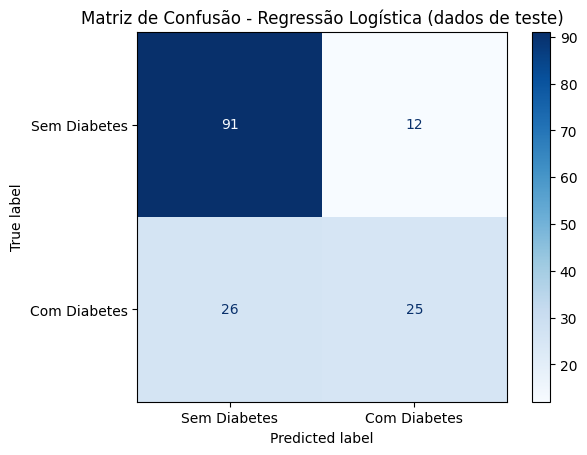

In [ ]:
cm_dectree = confusion_matrix(diabetes_teste_y, pred_dectree_teste)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dectree, display_labels=["Sem Diabetes", "Com Diabetes"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística (dados de teste)")
plt.show()

## Floresta Aleatória

In [ ]:
pred_ranfor_teste = db_ranfor.predict(diabetes_teste_x)

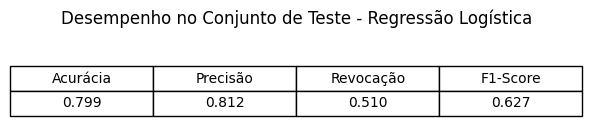

In [ ]:

acc_ranfor = accuracy_score(diabetes_teste_y, pred_ranfor_teste)
prec_ranfor = precision_score(diabetes_teste_y, pred_ranfor_teste)
rec_ranfor = recall_score(diabetes_teste_y, pred_ranfor_teste)
f1_ranfor = f1_score(diabetes_teste_y, pred_ranfor_teste)

fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')

colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
valores = [[f"{acc_ranfor:.3f}", f"{prec_ranfor:.3f}", f"{rec_ranfor:.3f}", f"{f1_ranfor:.3f}"]]

tabela = ax.table(
    cellText=valores,
    colLabels=colunas,
    loc='center',
    cellLoc='center'
)

tabela.scale(1.2, 2.2)
plt.title("Desempenho no Conjunto de Teste - Regressão Logística", pad=20)
plt.tight_layout()
plt.show()

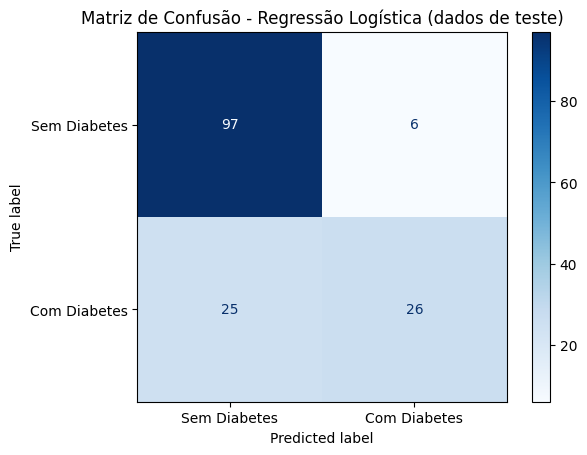

In [ ]:
cm_ranfor = confusion_matrix(diabetes_teste_y, pred_ranfor_teste)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ranfor, display_labels=["Sem Diabetes", "Com Diabetes"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística (dados de teste)")
plt.show()

## Máquinas de Vetores de Suporte

In [ ]:
pred_svm_teste = db_svm.predict(diabetes_teste_x)

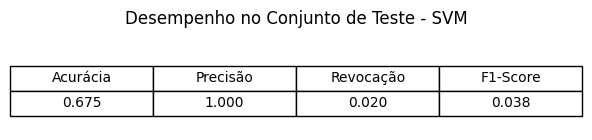

In [ ]:

acc_svm = accuracy_score(diabetes_teste_y, pred_svm_teste)
prec_svm = precision_score(diabetes_teste_y, pred_svm_teste)
rec_svm = recall_score(diabetes_teste_y, pred_svm_teste)
f1_svm = f1_score(diabetes_teste_y, pred_svm_teste)

fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')

colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
valores = [[f"{acc_svm:.3f}", f"{prec_svm:.3f}", f"{rec_svm:.3f}", f"{f1_svm:.3f}"]]

tabela = ax.table(
    cellText=valores,
    colLabels=colunas,
    loc='center',
    cellLoc='center'
)

tabela.scale(1.2, 2.2)
plt.title("Desempenho no Conjunto de Teste - SVM", pad=20)
plt.tight_layout()
plt.show()

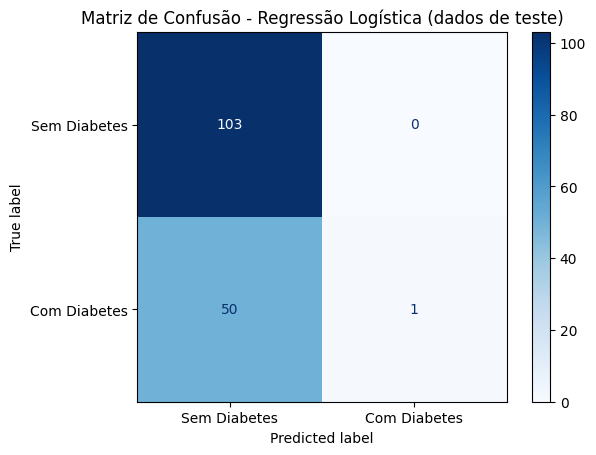

In [ ]:
cm_svm = confusion_matrix(diabetes_teste_y, pred_svm_teste)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Sem Diabetes", "Com Diabetes"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística (dados de teste)")
plt.show()

## K-Nearest Neighbors

In [ ]:
pred_knn_teste = db_knn.predict(diabetes_teste_x)

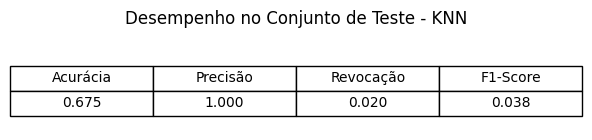

In [ ]:

acc_knn = accuracy_score(diabetes_teste_y, pred_knn_teste)
prec_knn = precision_score(diabetes_teste_y, pred_knn_teste)
rec_knn = recall_score(diabetes_teste_y, pred_knn_teste)
f1_knn = f1_score(diabetes_teste_y, pred_knn_teste)

fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')

colunas = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score']
valores = [[f"{acc_knn:.3f}", f"{prec_knn:.3f}", f"{rec_knn:.3f}", f"{f1_knn:.3f}"]]

tabela = ax.table(
    cellText=valores,
    colLabels=colunas,
    loc='center',
    cellLoc='center'
)

tabela.scale(1.2, 2.2)
plt.title("Desempenho no Conjunto de Teste - KNN", pad=20)
plt.tight_layout()
plt.show()

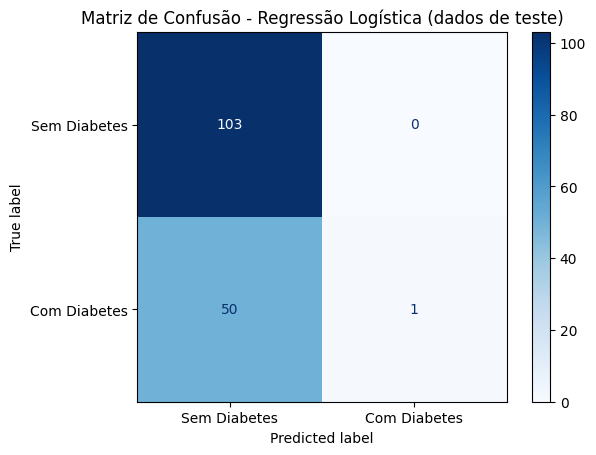

In [ ]:
cm_knn = confusion_matrix(diabetes_teste_y, pred_knn_teste)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Sem Diabetes", "Com Diabetes"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística (dados de teste)")
plt.show()

## Últimas análises

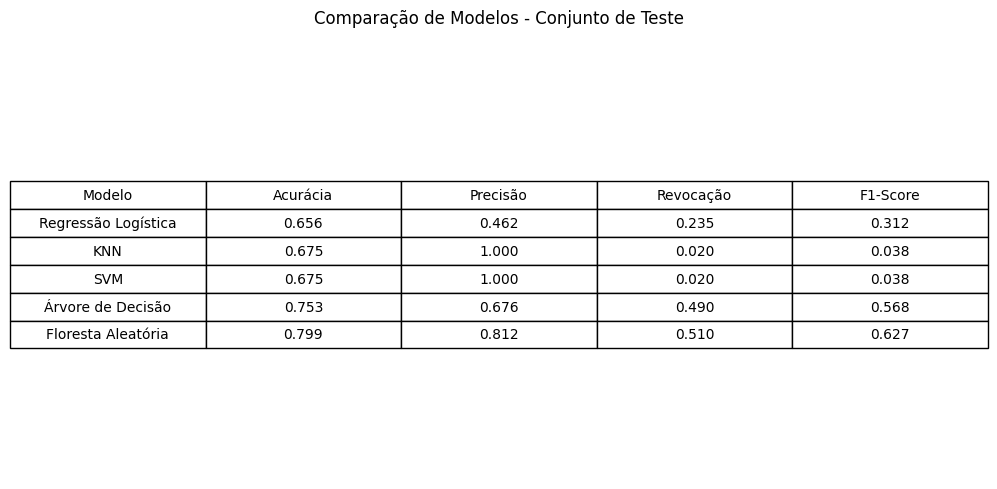

In [ ]:
logreg_metrics   = [acc_logreg, prec_logreg, rec_logreg, f1_logreg]
knn_metrics      = [acc_knn, prec_knn, rec_knn, f1_knn]
svm_metrics      = [acc_svm, prec_svm, rec_svm, f1_svm]
dectree_metrics  = [acc_dectree, prec_dectree, rec_dectree, f1_dectree]
ranfor_metrics   = [acc_ranfor, prec_ranfor, rec_ranfor, f1_ranfor]


tabela_resultados = [
    ['Regressão Logística'] + [f"{v:.3f}" for v in logreg_metrics],
    ['KNN']                 + [f"{v:.3f}" for v in knn_metrics],
    ['SVM']                 + [f"{v:.3f}" for v in svm_metrics],
    ['Árvore de Decisão']   + [f"{v:.3f}" for v in dectree_metrics],
    ['Floresta Aleatória']  + [f"{v:.3f}" for v in ranfor_metrics],
]

colunas = ['Modelo', 'Acurácia', 'Precisão', 'Revocação', 'F1-Score']


fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')

tabela = ax.table(
    cellText=tabela_resultados,
    colLabels=colunas,
    cellLoc='center',
    loc='center'
)

tabela.scale(1.2, 1.5)
plt.title("Comparação de Modelos - Conjunto de Teste", pad=20)
plt.tight_layout()
plt.show()


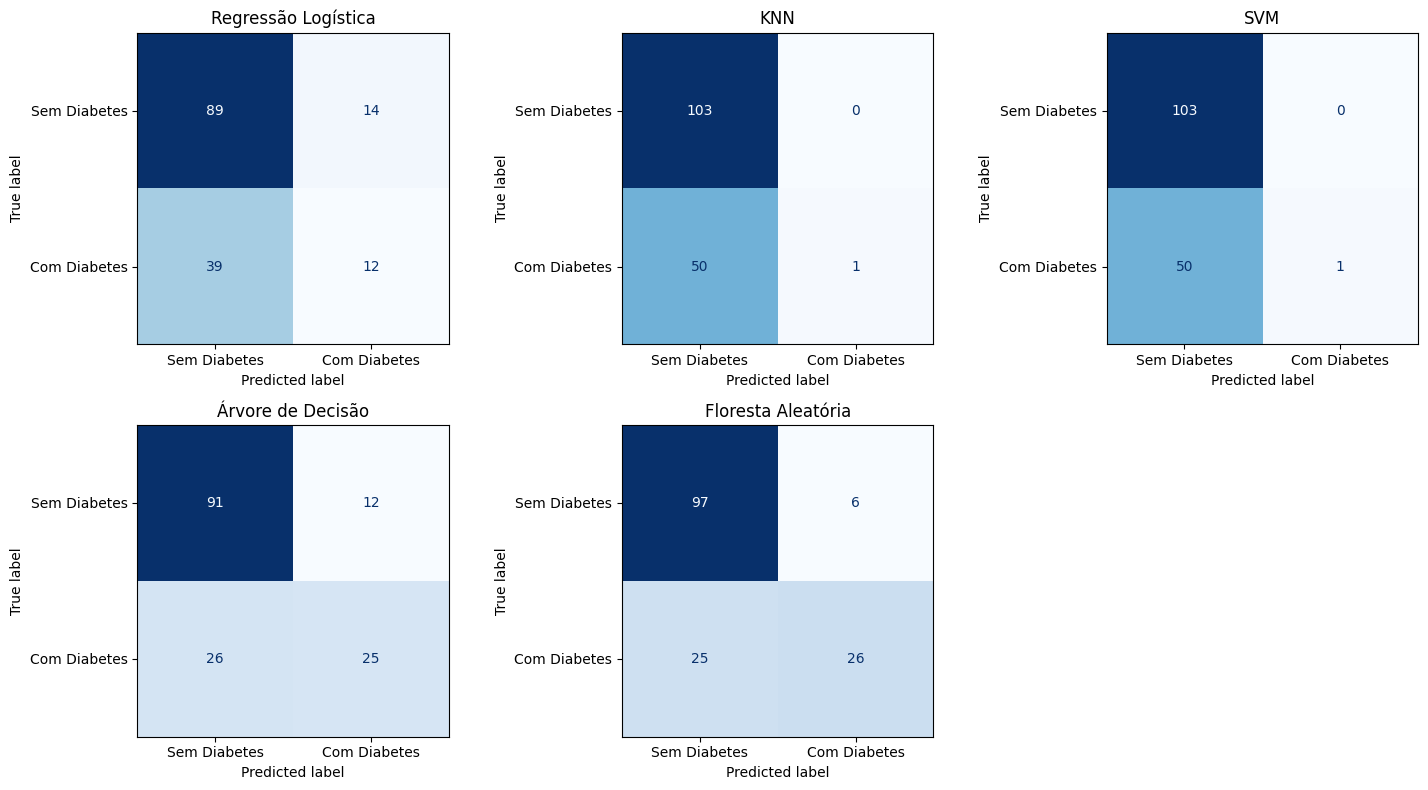

In [ ]:


modelos_preds = [
    ("Regressão Logística", pred_logreg_teste),
    ("KNN", pred_knn_teste),
    ("SVM", pred_svm_teste),
    ("Árvore de Decisão", pred_dectree_teste),
    ("Floresta Aleatória", pred_ranfor_teste)
]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, (nome, y_pred) in enumerate(modelos_preds):
    cm = confusion_matrix(diabetes_teste_y, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Sem Diabetes", "Com Diabetes"])
    disp.plot(ax=axs[i], cmap='Blues', colorbar=False)
    axs[i].set_title(nome)


if len(modelos_preds) < len(axs):
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

In [ ]:
### Fim

# FIM.